In [65]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

In [66]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/tommy/.venvs/B1_Scientific_Coding/lib/python3.10/site-packages', '/home/tommy/Projects/B1_Scientific_Coding']


## Test the from_csv and random_mission methods in the Mission class

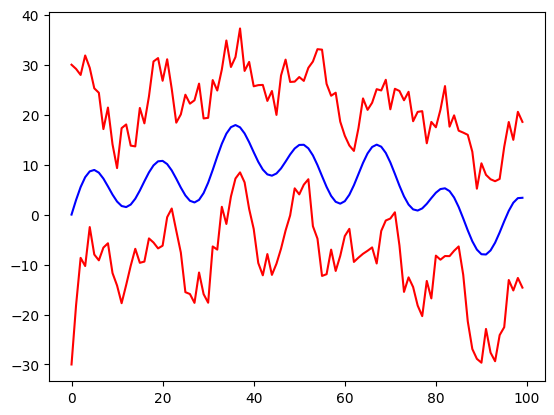

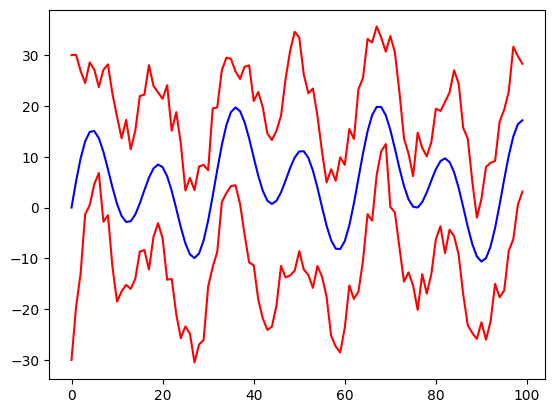

In [67]:
from uuv_mission.dynamic import Mission
from uuv_mission.terrain import plot_reference_and_terrain as plot_terrain

mission_csv = Mission.from_csv("../data/mission.csv")
plot_terrain(mission_csv.reference, mission_csv.cave_height, mission_csv.cave_depth)

mission_random = Mission.random_mission(duration=100, scale=10.0)
plot_terrain(mission_random.reference, mission_random.cave_height, mission_random.cave_depth)

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

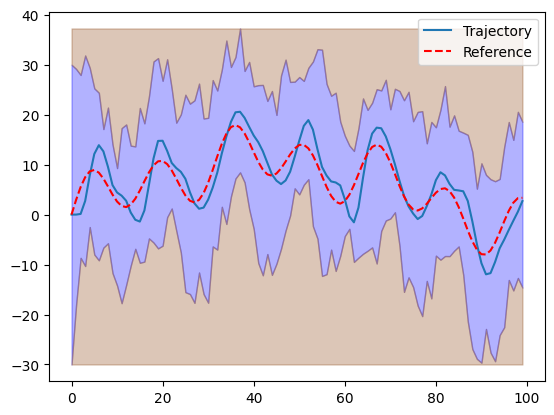

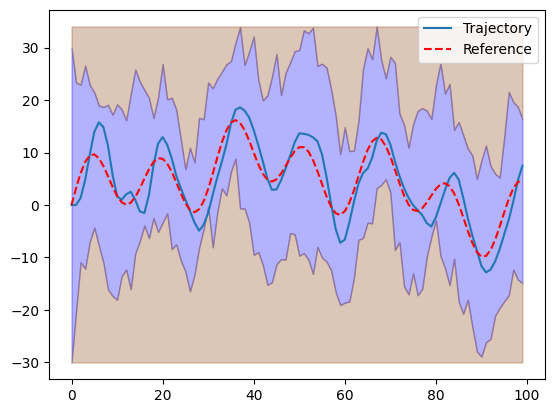

In [68]:
# Import relevant modules
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController

sub = Submarine()
controller = PDController(KP=0.15, KD=0.6) # These are the default gains, only shown for example usage
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv")

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

mission = Mission.random_mission(duration=100, scale=10.0)

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)